In [14]:

import glob
import numpy as np
import matplotlib.pyplot as plt
from scanimagetiffio import SITiffIO

In [2]:
#prepare the data for analysis

datafolder = '/home/zilong/Desktop/2D2P/Data/183_27072023'

#get all the tiff files under the parent folder with an extension of .tif
tifffiles = glob.glob(datafolder + "/*.tif")
#remove tifffiles with key words "stack"
tifffiles = [x for x in tifffiles if "stack" not in x]
#sort the tifffiles by the number in the file name
tifffiles.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

#get all the RElog files under the parent folder begin with 'RE' and with an extension of .txt
RElogfiles = glob.glob(datafolder + "/RE*.txt")
#remove RElogfiles with key words "stack", "00010" and "00012"
RElogfiles = [x for x in RElogfiles if "stack" not in x]

#get all the VRlog files under the parent folder begin with numbers and with an extension of .txt
VRlogfiles = glob.glob(datafolder + "/[0-9]*.txt")


#pair the tiff files and RElog files together which share the same key word
allfiles = []
for tifffile in tifffiles:
    #extract the key word from the tifffile
    #/home/zilong/Desktop/2D2P/Data/183_25072023/25072023_00005.tif' then extract 00005
    key = tifffile.split("/")[-1].split(".")[0].split("_")[-1]
    #find the RElogfile containing the key word
    RElogfile = [x for x in RElogfiles if key in x][0]
    #find the VRlogfile containing the key word
    VRlogfile = [x for x in VRlogfiles if key in x][0]
    #pair the tifffile and RElogfile together
    pair = [tifffile, RElogfile, VRlogfile]
    #append the pair to allfiles
    allfiles.append(pair)

In [3]:
#lets analysis the first session
tifffile, relogfile, vrlogfile  = allfiles[0]
print ('processing: \n' + tifffile.split('/')[-1] + '\n' + relogfile.split('/')[-1] + '\n' + vrlogfile.split('/')[-1]+'...')

S = SITiffIO()
S.open_tiff_file(tifffile, "r")
S.open_rotary_file(relogfile)
S.open_log_file(vrlogfile)
S.interp_times()  # might take a while...

#plot the position of the animal in the VR with a gray line to indicate the path
plt.plot(S.get_all_raw_x(), S.get_all_raw_z(), 'lightgray')
#set the plot to be square
plt.axis('square')

processing: 
27072023_00003.tif
REdata_20230727_161337.00003.txt
20230727-161359.59.00003.txt...
Loading rotary encoder file: /home/zilong/Desktop/2D2P/Data/183_27072023/REdata_20230727_161337.00003.txt
Calculating rotations and times from rotary encoder data...
Finished calculating rotations and times.
The rotary encoder file has 27032 timestamps in it.

Loading log file: /home/zilong/Desktop/2D2P/Data/183_27072023/20230727-161359.59.00003.txt
Calculating rotations and times from log file data...
Finished calculating rotations and times.
The log file file has 13274 timestamps in it.
Counted 8355 frames


In [6]:
#get the position from all the data

#creata allX and allZ as a dictionary
allX = {}
allZ = {}

for session in range(len(allfiles)):
    tifffile, relogfile, vrlogfile  = allfiles[session]
    print ('processing: \n' + tifffile.split('/')[-1] + '\n' + relogfile.split('/')[-1] + '\n' + vrlogfile.split('/')[-1]+'...')
    
    S = SITiffIO()
    S.open_tiff_file(tifffile, "r")
    S.open_rotary_file(relogfile)
    S.open_log_file(vrlogfile)
    S.interp_times()  # might take a while...
    
    X = S.get_all_raw_x()
    Z = S.get_all_raw_z()
    
    #add the position to the dictionary
    allX[session] = X
    allZ[session] = Z
    


processing: 
27072023_00003.tif
REdata_20230727_161337.00003.txt
20230727-161359.59.00003.txt...
Loading rotary encoder file: /home/zilong/Desktop/2D2P/Data/183_27072023/REdata_20230727_161337.00003.txt
Calculating rotations and times from rotary encoder data...
Finished calculating rotations and times.
The rotary encoder file has 27032 timestamps in it.

Loading log file: /home/zilong/Desktop/2D2P/Data/183_27072023/20230727-161359.59.00003.txt
Calculating rotations and times from log file data...
Finished calculating rotations and times.
The log file file has 13274 timestamps in it.
Counted 8355 frames
processing: 
27072023_00004.tif
REdata_20230727_162227.00004.txt
20230727-162236.36.00004.txt...
Loading rotary encoder file: /home/zilong/Desktop/2D2P/Data/183_27072023/REdata_20230727_162227.00004.txt
Calculating rotations and times from rotary encoder data...
Finished calculating rotations and times.
The rotary encoder file has 27445 timestamps in it.
processing: 
27072023_00005.tif


In [8]:
#print the length of each element in the dictionary
for key in allX.keys():
    print(key, len(allX[key]))


0 8355
1 9000
2 9000
3 9000
4 9000
5 9000
6 9000
7 9000
8 9000
9 9000
10 500
11 9000


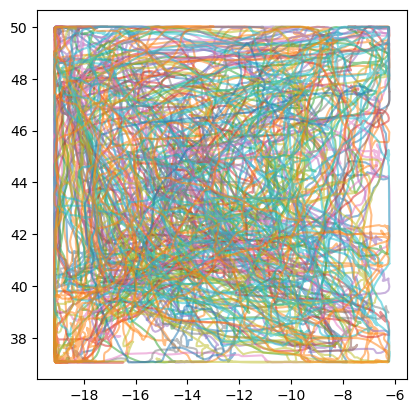

In [18]:
#plot the trajectory (allX, allZ) in the same figure, but with different colors
for i in range(len(allX)):
    plt.plot(allX[i], allZ[i], alpha=0.5)
plt.axis('square')
plt.show()


In [12]:
#combine all elements in allX in a large list
Xlist = []
for i in range(len(allX)):
    Xlist = Xlist + allX[i]
#combine all elements in allZ in a large list
Zlist = []
for i in range(len(allZ)):
    Zlist = Zlist + allZ[i]

#find the max min of X and Z
Xmax = max(Xlist); Xmin = min(Xlist)
Zmax = max(Zlist); Zmin = min(Zlist)

print('Xmax = ', Xmax, 'Xmin = ', Xmin)
print('Zmax = ', Zmax, 'Zmin = ', Zmin)


Xmax =  -6.197535991668701 Xmin =  -19.144269943237305
Zmax =  50.02376937866211 Zmin =  37.04793167114258


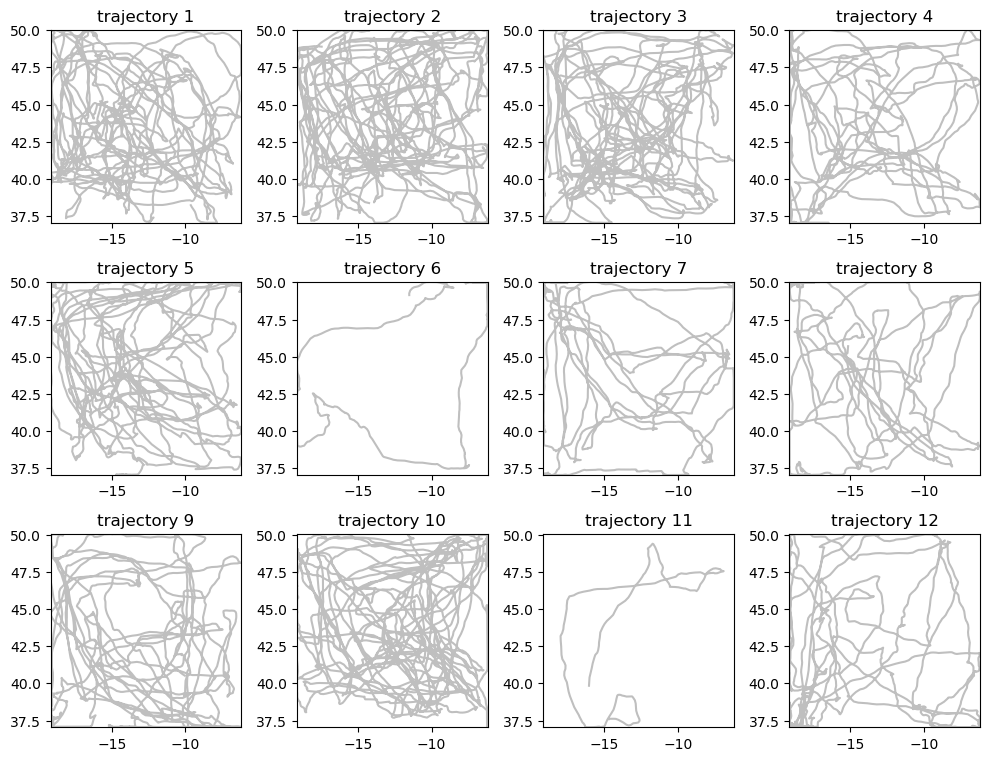

In [19]:
#plot the trajectory (allX, allZ) in subplots 
#with the axis lim set to Xmin-Xmax, Zmin-Zmax

numplots = len(allX)
rows = int(np.sqrt(numplots))+1
cols = int(np.sqrt(numplots))+1

plt.figure(figsize=(10,10))
for i in range(len(allX)):
    plt.subplot(rows,cols,i+1)
    plt.plot(allX[i], allZ[i], color='gray', alpha=0.5)
    plt.xlim(Xmin,Xmax)
    plt.ylim(Zmin,Zmax)
    plt.title('traj '+str(i+1) + 'runtime '+str(len(allX[i])/30)+'s')
plt.tight_layout()